In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [2]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 13, 8
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

In [3]:
with open("stats.json") as file:
    data = json.load(file)

In [4]:
algorithms = list(data.keys())

In [5]:
def ApplyMeanWindow(arr, window_size=10):
    result = []
    for ind in range(len(arr)):
        result.append(np.mean(arr[ind : min(ind + window_size, len(arr)+1)]))
    return result

def PlotComparativeGraph(metric: str, ylabel: str = 'value'):
    for algorithm in list(data.keys()):
        times = [x[0] for x in data[algorithm][metric]]
        values = [x[1] for x in data[algorithm][metric]]
        values = ApplyMeanWindow(values, 100)
        plt.plot(times, values, label=algorithm)

    plt.title(metric)
    plt.grid()
    plt.xlabel("timestamp")
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

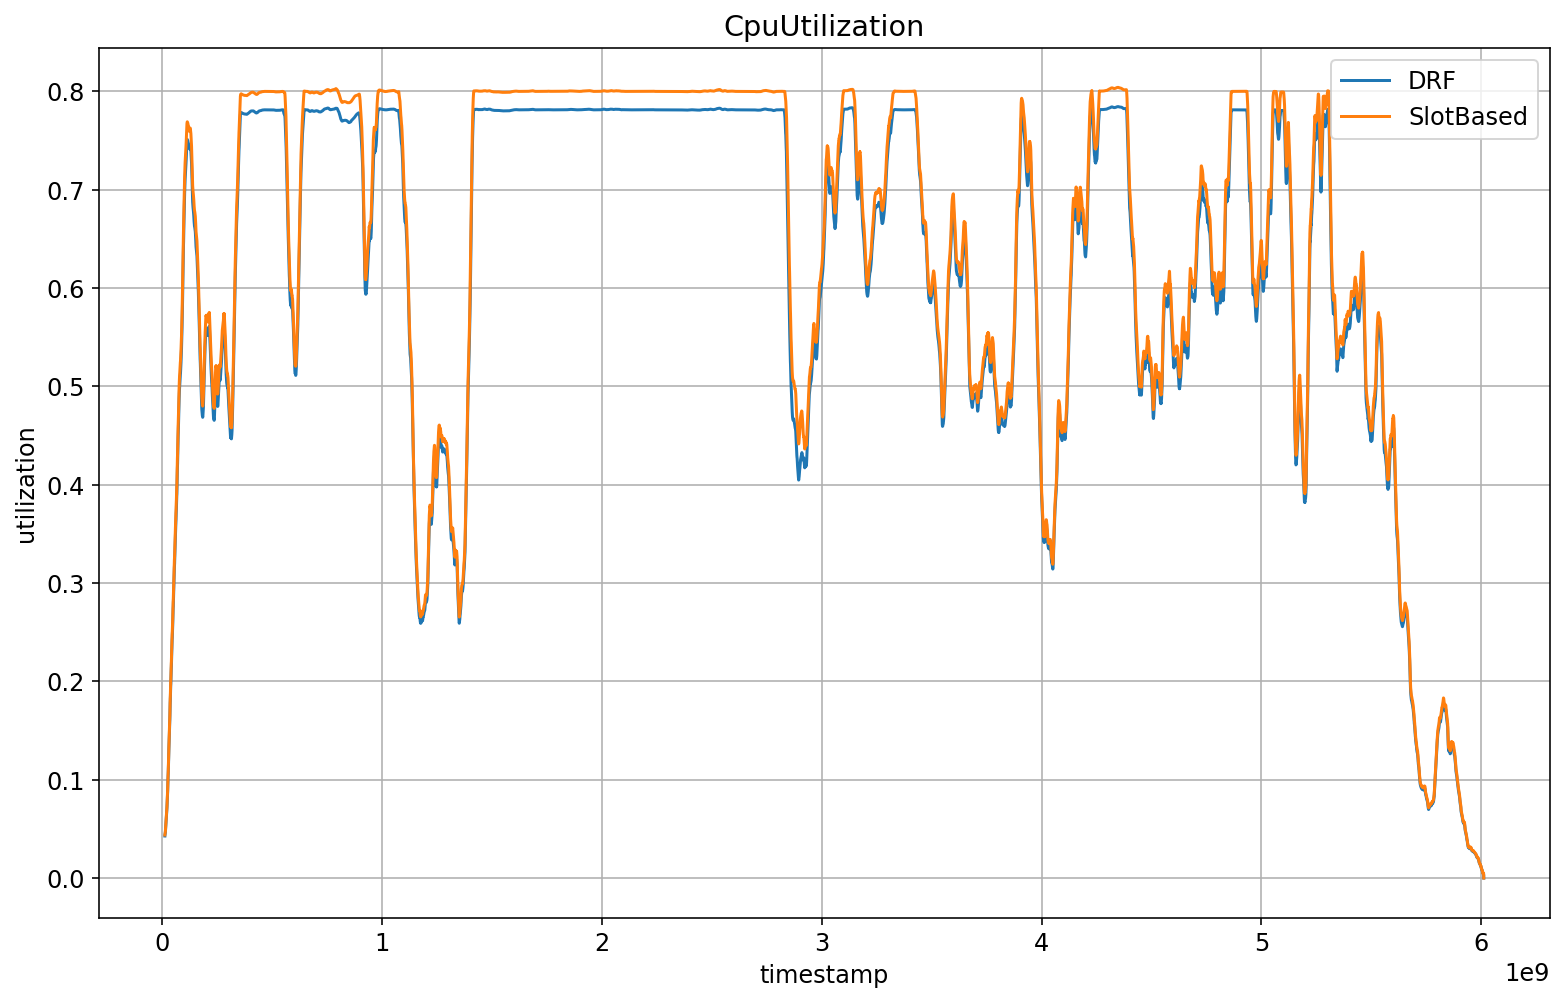

In [6]:
PlotComparativeGraph('CpuUtilization', 'utilization')

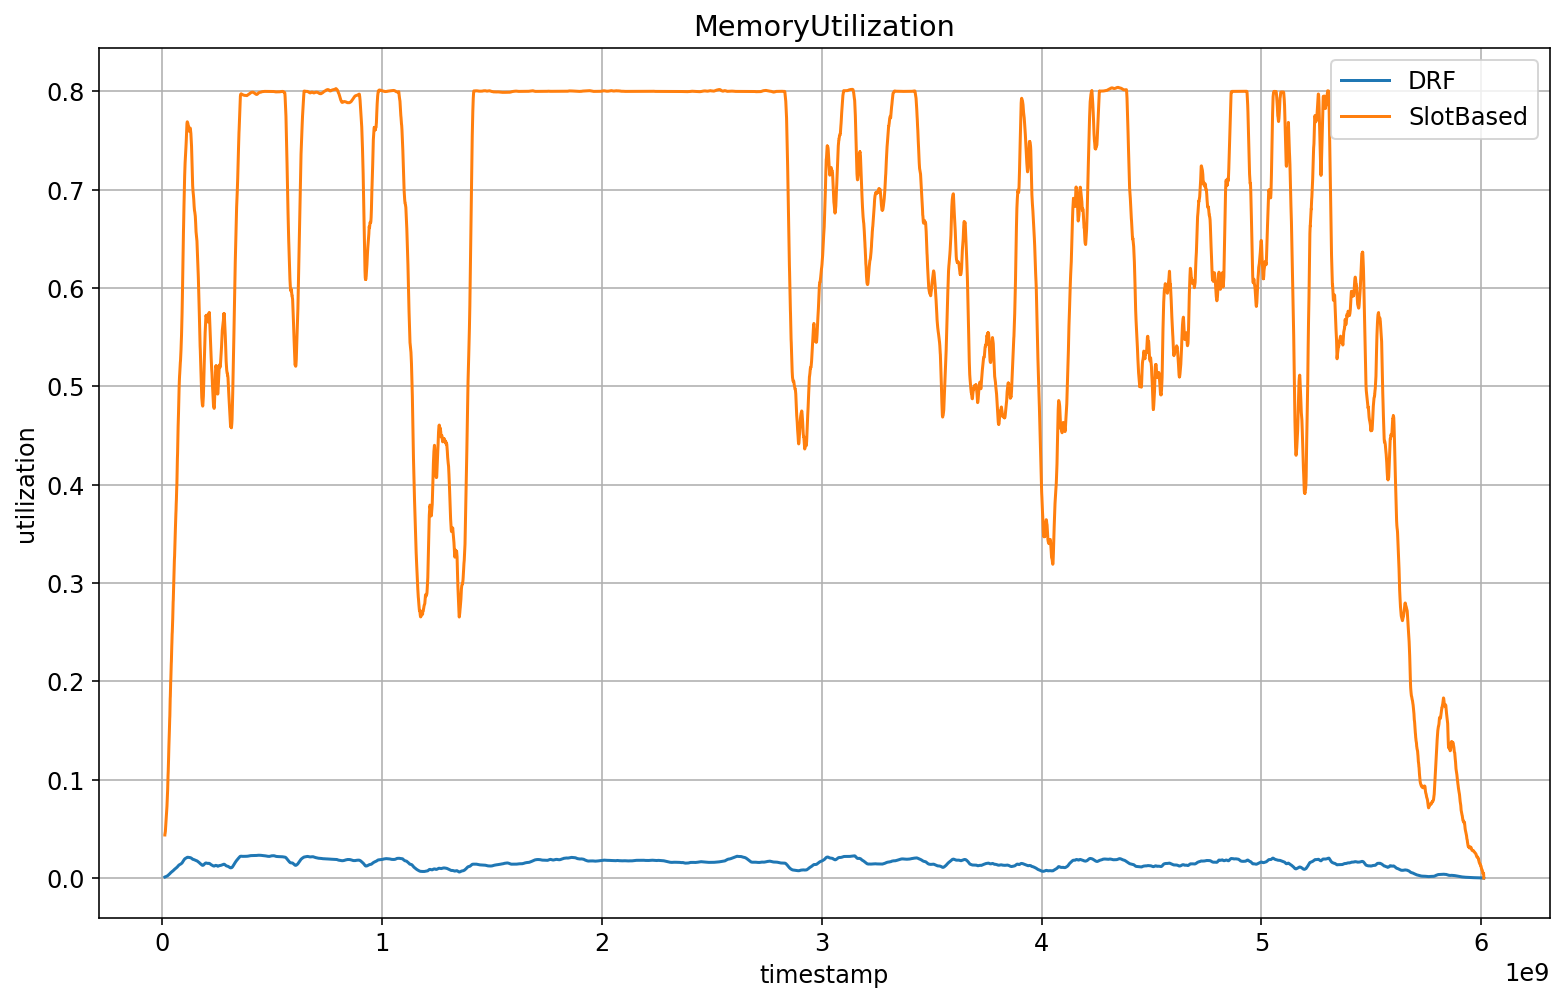

In [7]:
PlotComparativeGraph('MemoryUtilization', 'utilization')

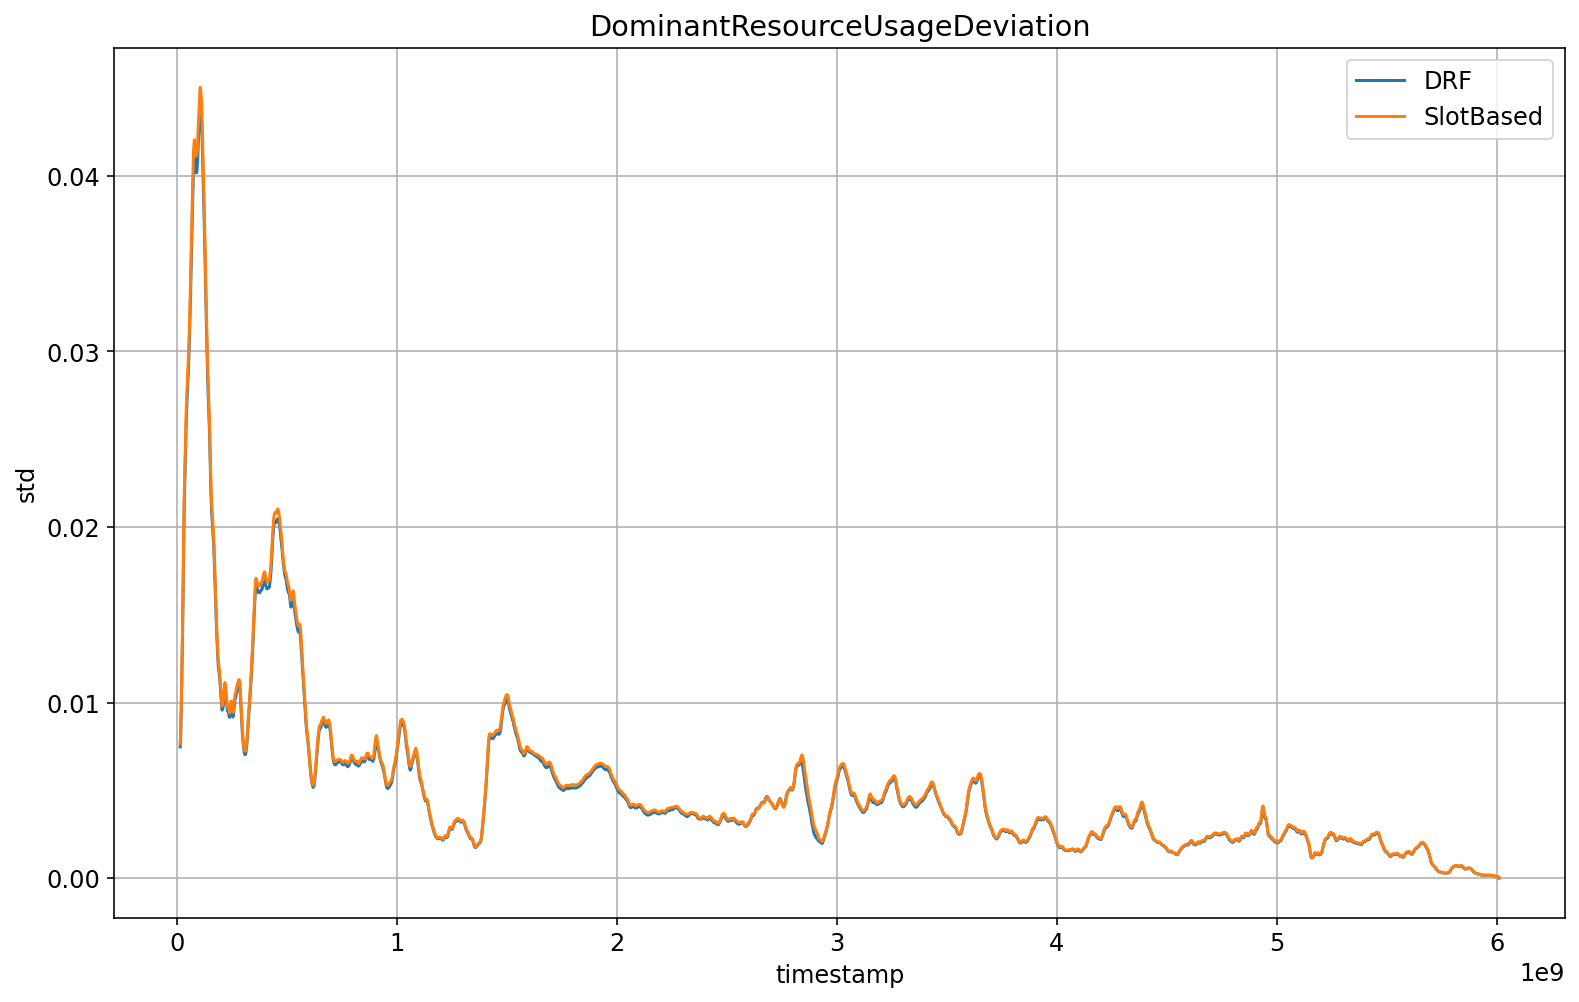

In [8]:
PlotComparativeGraph('DominantResourceUsageDeviation', 'std')

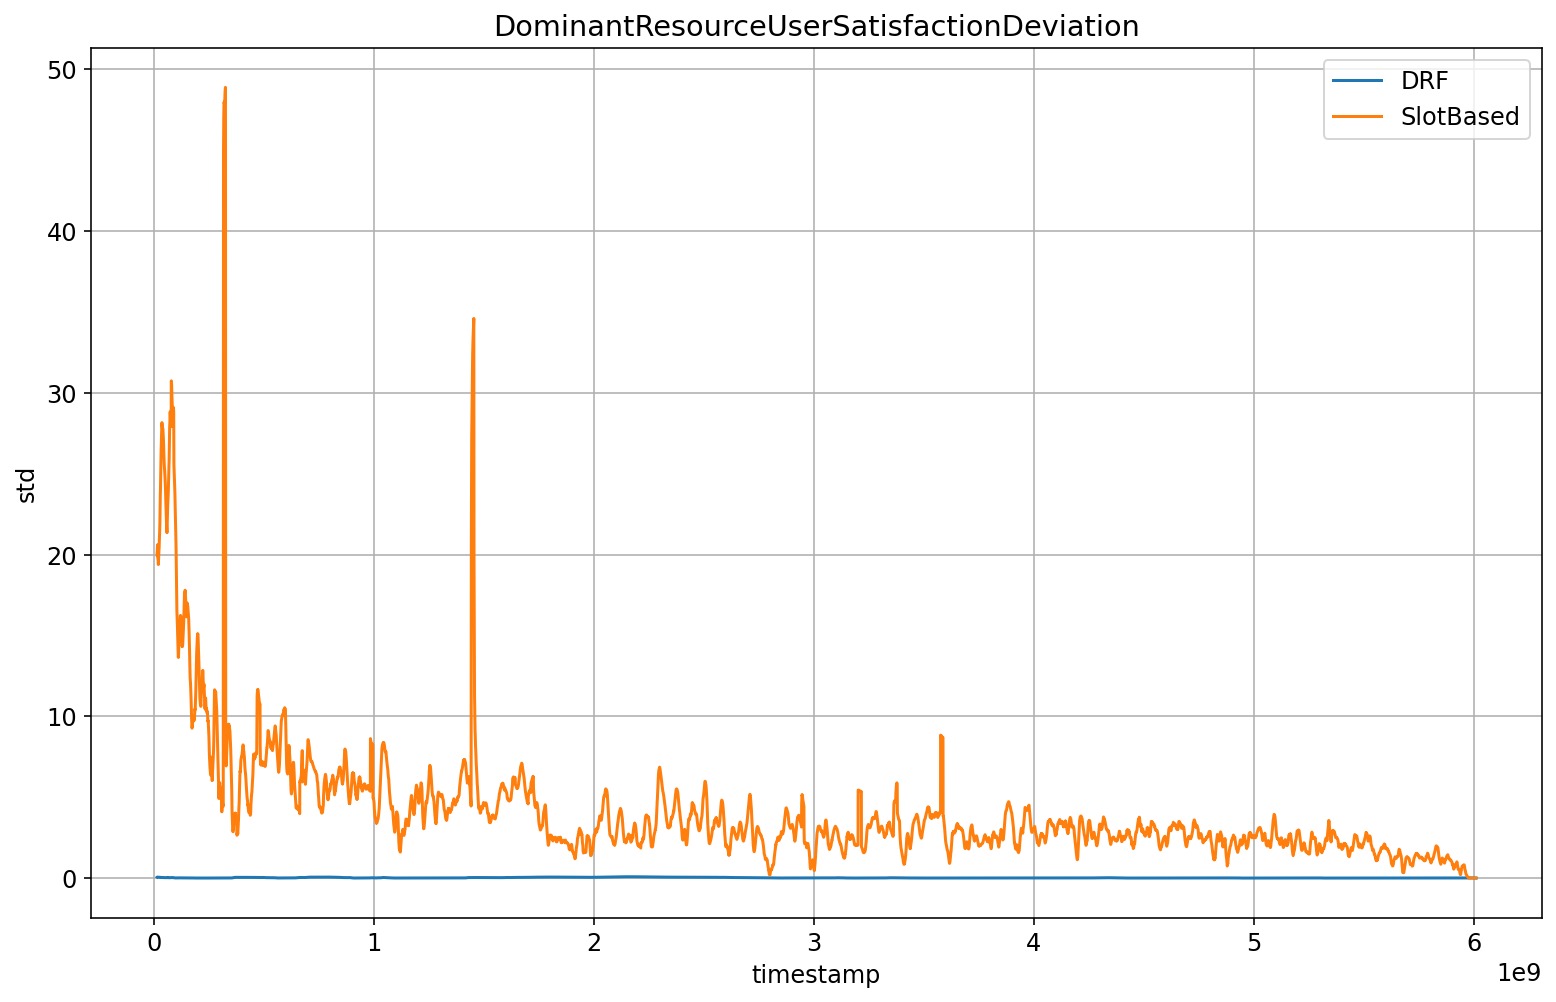

In [9]:
PlotComparativeGraph('DominantResourceUserSatisfactionDeviation', 'std')

Average Tasks Duration = 143.01661


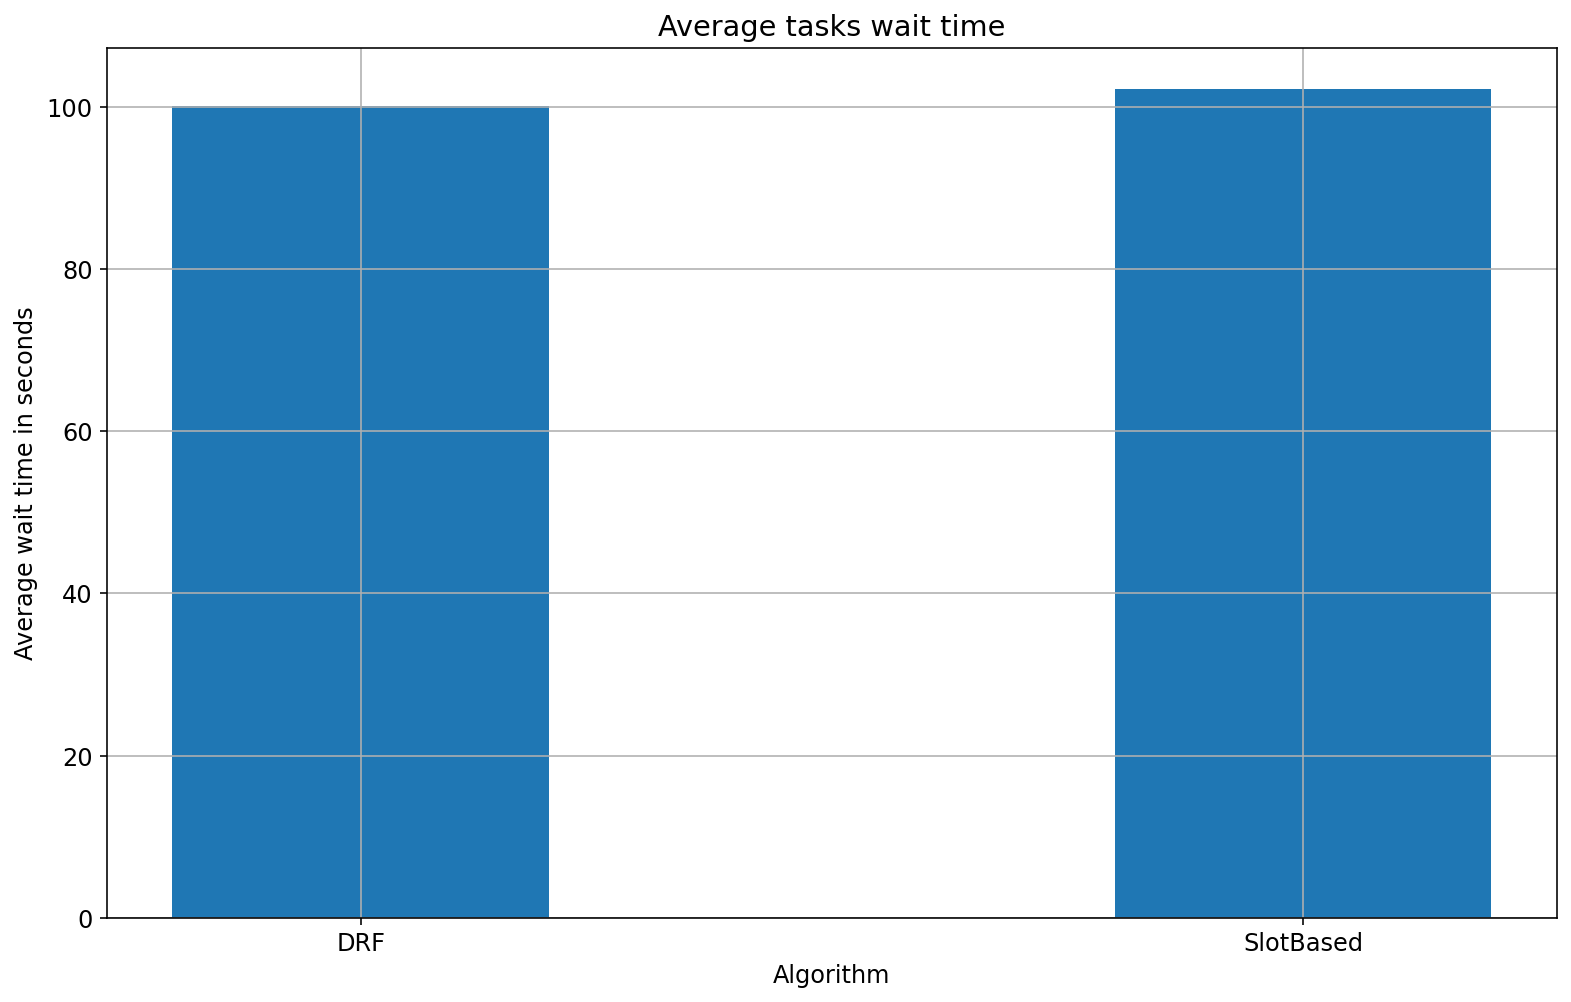

In [10]:
print('Average Tasks Duration =', data[algorithms[0]]['AverageTasksDuration'])
plt.bar(algorithms, [data[x]['AverageWaitTime'] for x in algorithms], width=0.4)
plt.xlabel("Algorithm")
plt.ylabel("Average wait time in seconds")
plt.title("Average tasks wait time")
plt.grid()
plt.show()